In [2]:
import pandas as pd 
import gc
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [3]:
gc.collect()

0

In [56]:
!pip3 install keras tensorflow

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 8.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 9.7 MB/s eta 0:00:000:00:01m eta 0:00:01
  Using cached wrapt-1.14.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (77 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 KB 8.2 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.7 MB/s eta 0:00:0010.5 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached t

In [47]:
df = pd.read_excel('./data/Arequipa.xlsx', engine='openpyxl', parse_dates=['date'], index_col='date')
df.head(3)

,region,cases,cumulative cases,calc deaths,deaths,cumulative deaths,total_tests,negative_tests,pcr_test_positive,serological_test_positive,ag_test_positive
date,,,,,,,,,,,
2020-03-13,AREQUIPA,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-14,AREQUIPA,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-15,AREQUIPA,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df['region'].unique()

array(['AREQUIPA'], dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2020-03-13 to 2022-04-05
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region                     754 non-null    object 
 1   cases                      754 non-null    float64
 2   cumulative cases           754 non-null    float64
 3   calc deaths                754 non-null    float64
 4   deaths                     754 non-null    float64
 5   cumulative deaths          754 non-null    float64
 6   total_tests                754 non-null    float64
 7   negative_tests             754 non-null    float64
 8   pcr_test_positive          754 non-null    float64
 9   serological_test_positive  754 non-null    float64
 10  ag_test_positive           754 non-null    float64
dtypes: float64(10), object(1)
memory usage: 70.7+ KB


<Axes: xlabel='date'>

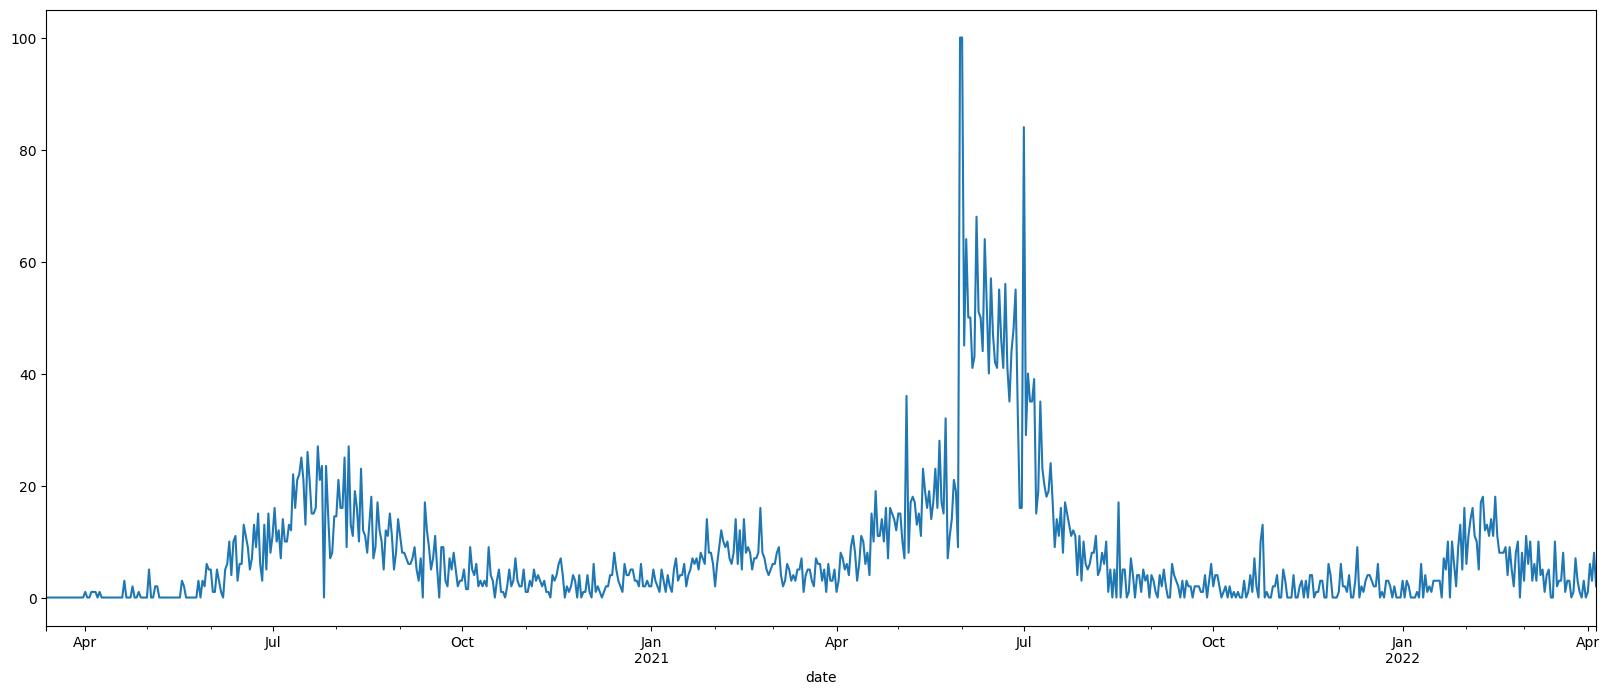

In [12]:
df['deaths'].plot(figsize=(20, 8))

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
res = adfuller(df['deaths'])
print(res[1])

0.05268077539984286


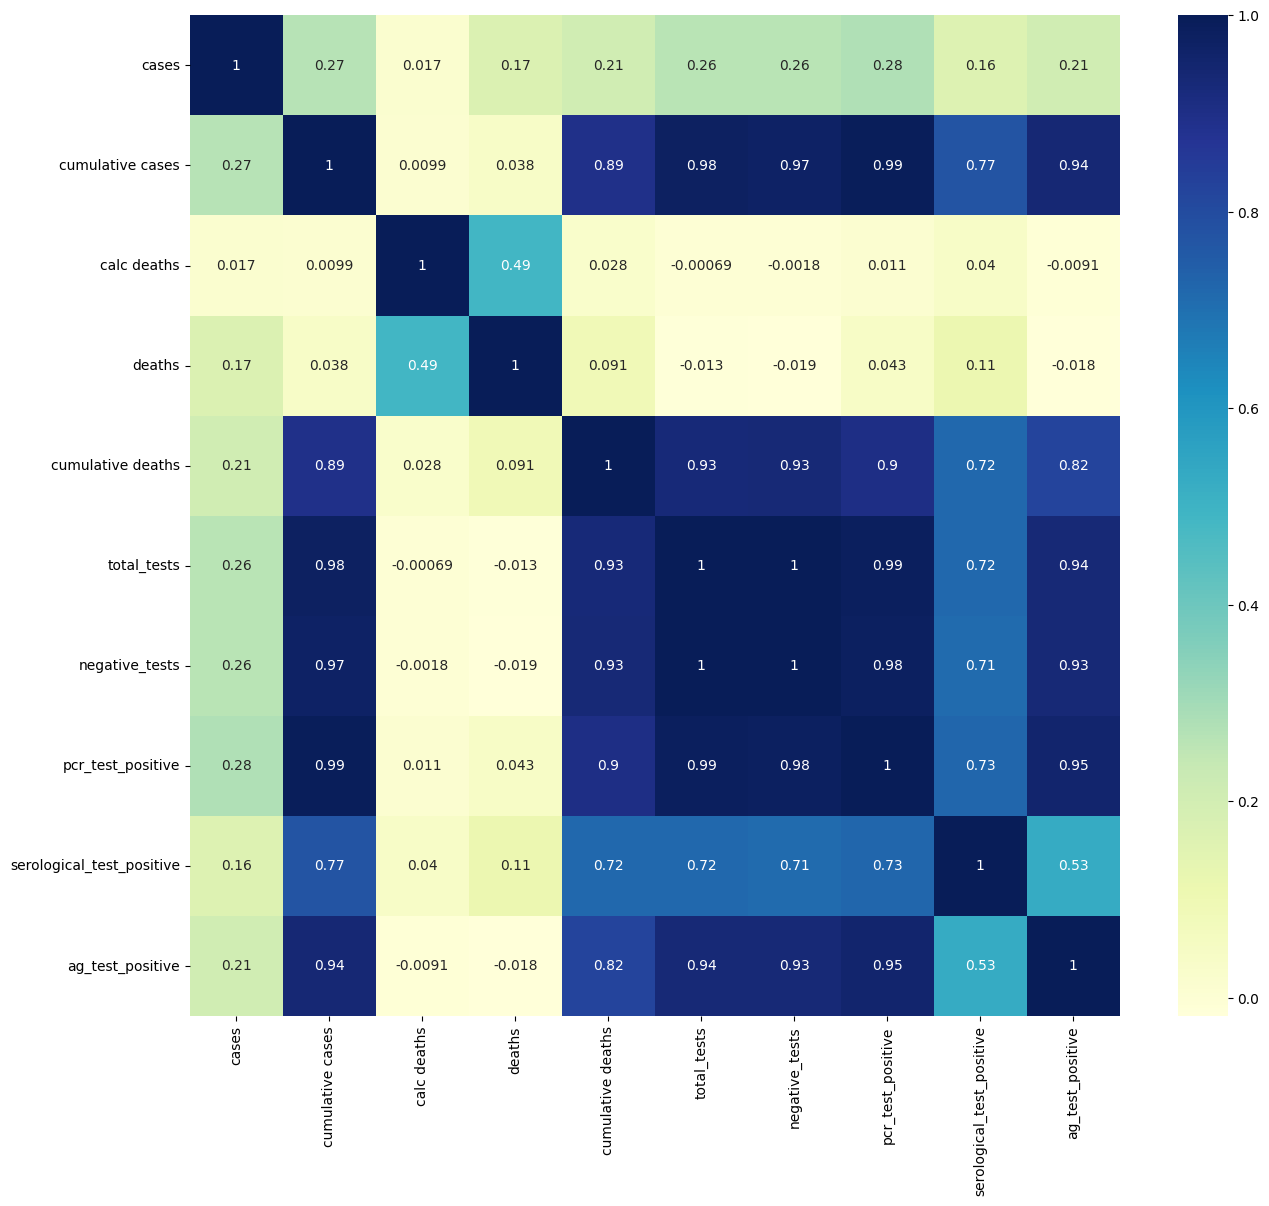

In [17]:
plt.figure(figsize=(15, 13))
dat = sns.heatmap(df.drop(['region'], axis=1).corr(), cmap="YlGnBu", annot=True)
plt.show()

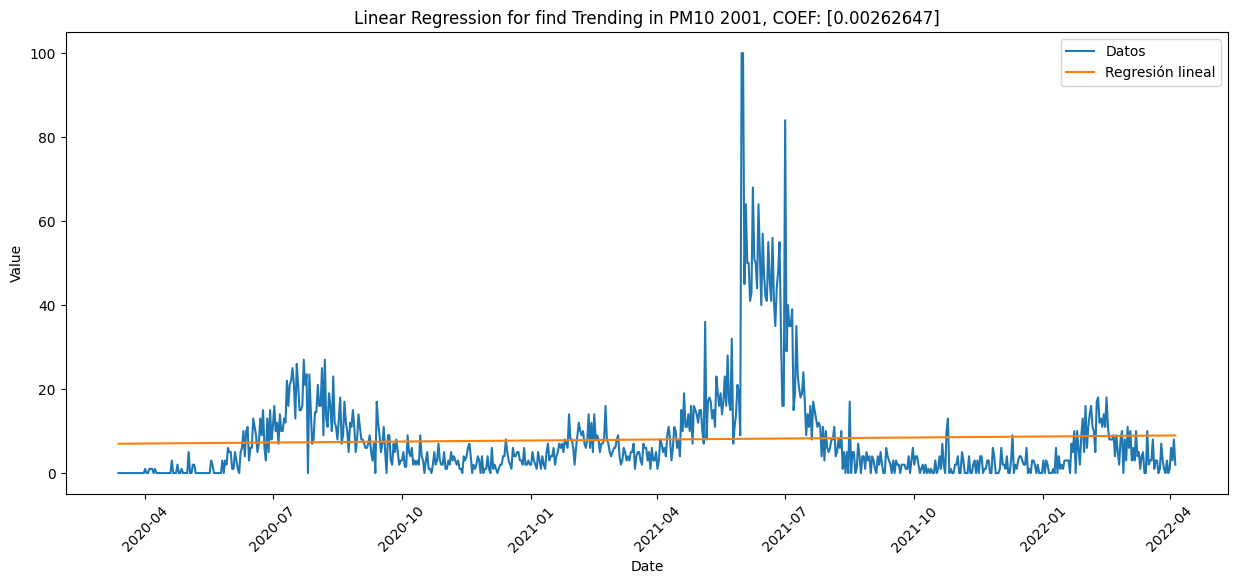

In [19]:
from sklearn.linear_model import LinearRegression

fechas = df.index.to_numpy()
valores = df['deaths'].to_numpy()

fechas_num = np.arange(len(fechas)).reshape(-1, 1)

regresion = LinearRegression()

regresion.fit(fechas_num, valores)

prediccion = regresion.predict(fechas_num)

plt.figure(figsize=(15, 6))
plt.plot(fechas, valores, label='Datos')
plt.plot(fechas, prediccion, label='Regresión lineal')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Linear Regression for find Trending in PM10 2001, COEF: {regresion.coef_}')
plt.legend()
plt.xticks(rotation=45)
plt.show()

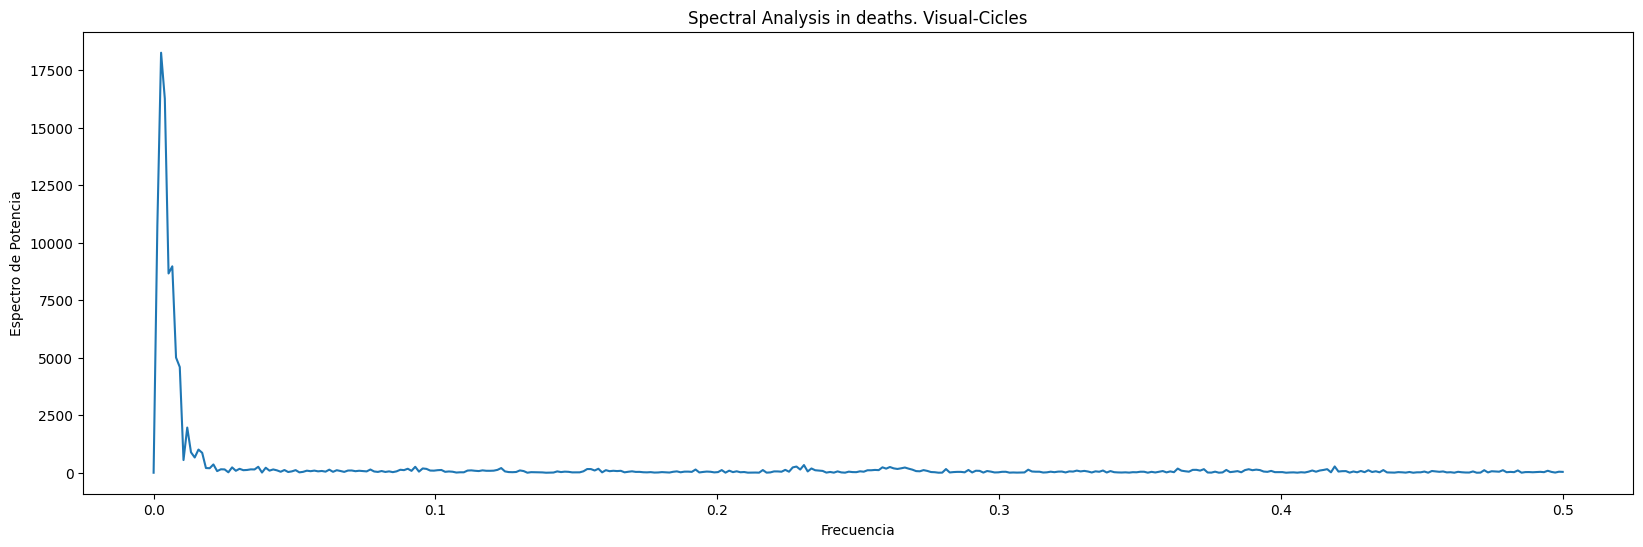

In [20]:
from scipy import signal

# Aplicar la transformada de Fourier a la serie temporal
frecuencias, espectro = signal.periodogram(df['deaths'])

# Visualizar el espectro de potencia
plt.figure(figsize=(20, 6))
plt.plot(frecuencias, espectro)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title(f'Spectral Analysis in deaths. Visual-Cicles')
plt.show()

In [34]:
df.reset_index(inplace=True)
df.head()

,date,region,cases,cumulative cases,calc deaths,deaths,cumulative deaths,total_tests,negative_tests,pcr_test_positive,serological_test_positive,ag_test_positive
0,2020-03-13,AREQUIPA,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-14,AREQUIPA,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-15,AREQUIPA,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-16,AREQUIPA,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-17,AREQUIPA,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
LEN_VISUALIZATE=150
 
df_v = df[:LEN_VISUALIZATE]

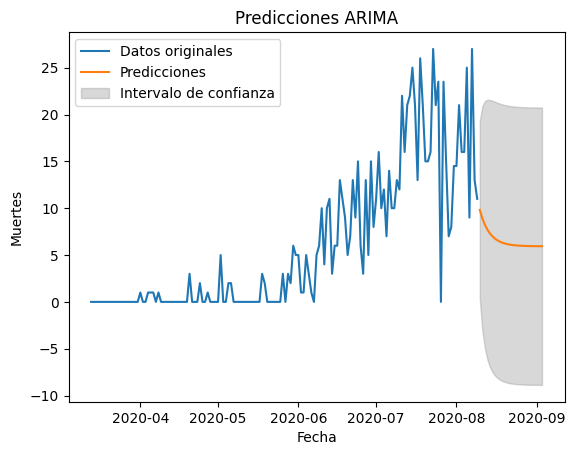

In [55]:
# Ajustar el modelo ARIMA
model = ARIMA(df_v['deaths'], order=(1, 0, 0))
model_fit = model.fit() 

# Realizar la predicción para los próximos 5 días
forecast = model_fit.get_forecast(steps=25)

# Obtener los valores predichos y los intervalos de confianza
forecast_values = forecast.predicted_mean
lower_conf_int = forecast.conf_int()['lower deaths']
upper_conf_int = forecast.conf_int()['upper deaths']

# Crear un índice de fechas para las predicciones
last_date = df_v['date'].max()
forecast_dates = pd.date_range(start=last_date, periods=len(forecast_values) + 1)[1:]

forec_val = forecast_values[:LEN_VISUALIZATE]
lower_v = lower_conf_int[:LEN_VISUALIZATE]
upper_v = upper_conf_int[:LEN_VISUALIZATE]
forec_dat = forecast_dates[:LEN_VISUALIZATE]

# Graficar los datos originales y las predicciones
plt.plot(df_v['date'], df_v['deaths'], label='Datos originales')
plt.plot(forec_dat, forec_val, label='Predicciones')
plt.fill_between(forec_dat, lower_v, upper_v, alpha=0.3, color='gray', label='Intervalo de confianza')
plt.xlabel('Fecha')
plt.ylabel('Muertes')
plt.title('Predicciones ARIMA')
plt.legend()
plt.show()

In [57]:
# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

2023-06-23 12:48:18.116059: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-23 12:48:18.279227: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-23 12:48:18.281338: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 12:48:19.136723: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[[185.99445 207.60954]]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

2023-06-23 13:01:58.995370: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-23 13:01:59.146618: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-23 13:01:59.147896: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 13:02:00.090872: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Crear una secuencia ficticia
data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])

# Normalizar los datos (opcional)
max_value = np.max(data)
data = data / max_value

# Dividir la secuencia en muestras de entrada y salida
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # Encontrar el final de este patrón
        end_ix = i + n_steps
        # Verificar si estamos más allá de la secuencia
        if end_ix > len(sequence) - 1:
            break
        # Recopilar las partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Elegir el número de pasos en el tiempo
n_steps = 3

# Dividir la secuencia en muestras de entrada y salida utilizando la función split_sequence
X, y = split_sequence(data, n_steps)

# Reshape input para que sea [muestras, pasos de tiempo, características]
X = X.reshape((X.shape[0], n_steps, 1))

In [18]:
# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

In [19]:
# Crear una secuencia ficticia para hacer la predicción
new_sequence = np.array([70, 80, 90])

# Normalizar los datos (si es necesario)
new_sequence = new_sequence / max_value

# Reshape input para que sea [muestras, pasos de tiempo, características]
new_input = new_sequence.reshape((1, n_steps, 1))

In [20]:
# Realizar la predicción
predicted_value = model.predict(new_input)

# Desnormalizar el valor de predicción (si es necesario)
predicted_value = predicted_value * max_value


1/1 [==============================] - 0s 100ms/step


In [26]:
print("Valor de predicción:", predicted_value)

Valor de predicción: [[-5.283364]]


# LSTM TUTOTIAL

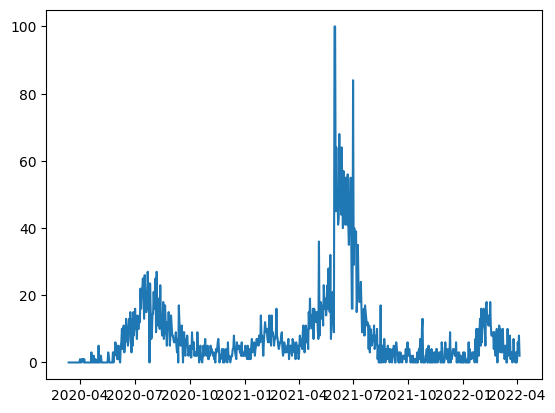

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./data/Arequipa.xlsx', usecols=['date', 'deaths'], parse_dates=['date'], index_col='date', engine='openpyxl')
plt.plot(df)
plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [32]:
tf.random.set_seed(7)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2020-03-13 to 2022-04-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   deaths  754 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [34]:
df = df.values
df = df.astype('float32')

In [35]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [36]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]  #ecnica 
print(len(train), len(test))

505 249


In [37]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [39]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [40]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [41]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') # resulados con diferenes opimizadores, # varias hiperparameros
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


2023-06-23 13:18:25.934176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-23 13:18:25.937241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-23 13:18:25.939425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

503/503 - 3s - loss: 0.0160 - 3s/epoch - 6ms/step
Epoch 2/100
503/503 - 1s - loss: 0.0122 - 1s/epoch - 2ms/step
Epoch 3/100
503/503 - 1s - loss: 0.0090 - 1s/epoch - 2ms/step
Epoch 4/100
503/503 - 1s - loss: 0.0073 - 1s/epoch - 2ms/step
Epoch 5/100
503/503 - 1s - loss: 0.0067 - 1s/epoch - 2ms/step
Epoch 6/100
503/503 - 1s - loss: 0.0066 - 1s/epoch - 2ms/step
Epoch 7/100
503/503 - 1s - loss: 0.0066 - 1s/epoch - 2ms/step
Epoch 8/100
503/503 - 1s - loss: 0.0066 - 1s/epoch - 2ms/step
Epoch 9/100
503/503 - 1s - loss: 0.0064 - 1s/epoch - 2ms/step
Epoch 10/100
503/503 - 1s - loss: 0.0065 - 1s/epoch - 2ms/step
Epoch 11/100
503/503 - 1s - loss: 0.0065 - 1s/epoch - 2ms/step
Epoch 12/100
503/503 - 1s - loss: 0.0066 - 1s/epoch - 2ms/step
Epoch 13/100
503/503 - 1s - loss: 0.0065 - 1s/epoch - 2ms/step
Epoch 14/100
503/503 - 1s - loss: 0.0066 - 1s/epoch - 2ms/step
Epoch 15/100
503/503 - 1s - loss: 0.0065 - 1s/epoch - 2ms/step
Epoch 16/100
503/503 - 1s - loss: 0.0065 - 1s/epoch - 2ms/step
Epoch 17/100


In [42]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

16/16 [==============================] - 1s 2ms/step


2023-06-23 13:20:31.798148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-23 13:20:31.799886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-23 13:20:31.801219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 0s 2ms/step
Train Score: 7.95 RMSE
Test Score: 4.06 RMSE


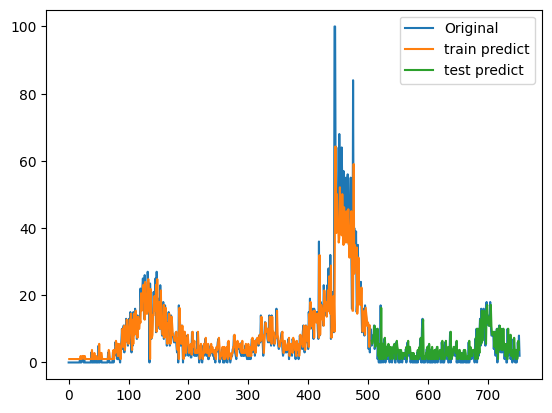

In [45]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='Original')
plt.plot(trainPredictPlot, label='train predict')
plt.plot(testPredictPlot, label='test predict')
plt.legend()
plt.show()

In [49]:
# validar con oros daases 
# probar por oros deparmaneos 
# edades separar rangos para validacion, genero 
 

In [ ]:
df_f =  pd.read_csv('./daa')